<a href="https://colab.research.google.com/github/Mshikalgar/playstore-data-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns             
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read the csv file 
play_store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/play store app review analysis /Copy of Play Store Data.csv")
user_review_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/play store app review analysis /Copy of User Reviews.csv")

In [6]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
play_store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
user_review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [10]:
# check the size of the data set
print("shape of playstore data : ",play_store_df.shape)

print("shape of user review data : ",user_review_df.shape)



shape of playstore data :  (10841, 13)
shape of user review data :  (64295, 5)


In [11]:
# check for the duplicate entry 
print("duplicate value in play store data :",len(play_store_df[play_store_df.duplicated()]))
print("duplicate value in the user review data : ", len(user_review_df[user_review_df.duplicated()]))

duplicate value in play store data : 483
duplicate value in the user review data :  33616


In [12]:
duplicate_data = play_store_df[play_store_df.duplicated(keep = 'last')]

In [13]:
duplicate_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


In [14]:
new_playstore_data = play_store_df.drop_duplicates()
new_playstore_data.shape

(10358, 13)

In [15]:
duplicate_user_reviews = user_review_df[user_review_df.duplicated(keep = 'last') ] 
duplicate_user_reviews.shape


(33616, 5)

In [16]:
new_user_review_df = user_review_df.drop_duplicates() 
new_user_review_df.shape

(30679, 5)

In [17]:
#remove the impurities from the data 
new_playstore_data1 = new_playstore_data.replace('[+,,]','',regex = True)
new_playstore_data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


In [18]:
#analyse the data frame

def playstoreinfo():
    playstore_data = pd.DataFrame(index=new_playstore_data1.columns)
    playstore_data['DataType'] = new_playstore_data1.dtypes
    playstore_data['non null_values'] = new_playstore_data1.count()
    playstore_data['unique_values'] = new_playstore_data1.nunique()
    playstore_data['NAN_values'] = new_playstore_data1.isnull().sum()
    playstore_data['NAN_values_percentage'] = new_playstore_data1.isnull().sum()*100
    return playstore_data
playstoreinfo()

,DataType,non null_values,unique_values,NAN_values,NAN_values_percentage
App,object,10358,9653,0,0
Category,object,10358,34,0,0
Rating,float64,8893,40,1465,146500
Reviews,object,10358,6002,0,0
Size,object,10358,462,0,0
Installs,object,10358,21,0,0
Type,object,10357,3,1,100
Price,object,10358,93,0,0
Content Rating,object,10357,6,1,100
Genres,object,10358,120,0,0


App section 

---
by analysing the above data we can see that the app section have some duplicate data 










In [19]:
duplicate_app = new_playstore_data1[new_playstore_data1.duplicated('App')]
duplicate_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner OCR FREE,BUSINESS,4.2,80804,Varies with device,5000000,Free,0,Everyone,Business,February 26 2018,Varies with device,4.0.3 and up
293,OfficeSuite : Free Office PDF Editor,BUSINESS,4.3,1002859,35M,100000000,Free,0,Everyone,Business,August 2 2018,9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,51510,Varies with device,5000000,Free,0,Everyone,Business,August 2 2018,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,August 1 2018,Varies with device,Varies with device
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,500000000,Free,0,Everyone,Communication,June 8 2018,9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Solitaire,GAME,4.6,11235,Varies with device,100000,Paid,$2.99,Everyone,Card,July 30 2018,Varies with device,Varies with device
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,100000,Free,0,Mature 17,Dating,February 25 2016,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0,Everyone,Communication,July 6 2018,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,50000,Free,0,Everyone,Medical,March 24 2018,2.1.0.372,4.4 and up


deleting the duplicate data 

In [20]:
new_playstore_data2 = new_playstore_data1.drop_duplicates(subset = 'App' , keep = 'last')
pd.DataFrame(new_playstore_data2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,March 26 2017,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


category section

In [21]:
#identify the value in the rating section 
pd.DataFrame(new_playstore_data2['Category'].value_counts(ascending=True)).head()

,Category
1.9,1
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,61


In [22]:
# 1.9 look like a mismatch value so checking it 
new_playstore_data2[new_playstore_data2['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000,Free,0,Everyone,NaN,February 11 2018,1.0.19,4.0 and up,NaN


In [23]:
#data have entry mistake not matching parameters with other all data so deleting index 10472 from dataframe
new_playstore_data2 = new_playstore_data2.drop(10472)

Rating section

In [24]:
new_playstore_data2['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, nan, 3.3, 3.4, 3.5, 3.1, 5. , 2.5, 2.8, 3. , 2.7, 1. ,
       1.9, 2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [25]:
new_playstore_data2['Rating'].isnull().sum()

1464

In [26]:
new_playstore_data2.Rating.median()

4.3

In [27]:
x = new_playstore_data2.Rating.median()
new_playstore_data2.Rating.fillna(x,inplace = True)
new_playstore_data2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [28]:
new_playstore_data2['Rating'] = new_playstore_data2['Rating'].astype('float64')
new_playstore_data2['Rating'].dtype

dtype('float64')

In [29]:
new_playstore_data2['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.5, 2.8, 3. , 2.7, 1. , 1.9,
       2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

**Review section **

In [30]:
new_playstore_data2['Reviews'].unique()

array(['159', '87510', '215644', ..., '603', '1195', '398307'],
      dtype=object)

In [31]:
# new_playstore_data2['Reviews'] = new_playstore_data2['Reviews'].astype('int')
# new_playstore_data2['Reviews'].dtype

In [32]:
new_playstore_data2['Reviews'] = pd.to_numeric(new_playstore_data2['Reviews'] , errors = 'coerce')
new_playstore_data2['Reviews'].dtype

dtype('int64')

In [33]:
new_playstore_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9652 non-null   object 
 1   Category        9652 non-null   object 
 2   Rating          9652 non-null   float64
 3   Reviews         9652 non-null   int64  
 4   Size            9652 non-null   object 
 5   Installs        9652 non-null   object 
 6   Type            9651 non-null   object 
 7   Price           9652 non-null   object 
 8   Content Rating  9652 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9652 non-null   object 
 11  Current Ver     9644 non-null   object 
 12  Android Ver     9650 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


*Install section*

In [34]:
new_playstore_data2['Installs'] =  pd.to_numeric(new_playstore_data2['Installs'] , errors = 'coerce')
new_playstore_data2['Installs'].isnull().sum()
new_playstore_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9652 non-null   object 
 1   Category        9652 non-null   object 
 2   Rating          9652 non-null   float64
 3   Reviews         9652 non-null   int64  
 4   Size            9652 non-null   object 
 5   Installs        9652 non-null   int64  
 6   Type            9651 non-null   object 
 7   Price           9652 non-null   object 
 8   Content Rating  9652 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9652 non-null   object 
 11  Current Ver     9644 non-null   object 
 12  Android Ver     9650 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.0+ MB


type section

In [35]:
# find the unquie value from the type section
new_playstore_data2['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [36]:
# find the nan data from the rows
new_playstore_data2[new_playstore_data2.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10,Strategy,June 28 2018,Varies with device,Varies with device


In [37]:
# change the type from nan to free
new_playstore_data2.loc[9148,'Type'] = 'Free'
new_playstore_data2.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  4.3
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                  Everyone 10
Genres                             Strategy
Last Updated                   June 28 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [38]:
new_playstore_data2['Type'].unique()

array(['Free', 'Paid'], dtype=object)

size section


In [39]:
new_playstore_data2['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [40]:
new_playstore_data2['Size'] = new_playstore_data2['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
new_playstore_data2['Size'] = new_playstore_data2['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
new_playstore_data2['Size'] = new_playstore_data2['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

In [41]:
new_playstore_data2['Size'].unique()

array(['19456', '8908', '25600', '2867', '5734', '29696', '33792', '3174',
       '28672', '12288', '20480', '21504', '37888', '2764', '5632',
       '17408', '39936', '31744', '14336', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', nan, '9625', '15360',
       '10240', '1228', '24576', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '3788', '22528',
       '7577', '6553', '3276', '8396', '10137', '5017', '9728', '5120',
       '6041', '13312', '74752', '6963', '3584', '4096', '2355', '7372',
       '2150', '43008', '7475', '9318', '56320', '23', '6656', '1536',
       '7680', '52224', '41984', '49152', '8704', '47104', '8499', '4403',
       '4812', '3379', '40960', '7987', '9011', '6758', '5222', '6

In [42]:
new_playstore_data2['Size'] = pd.to_numeric(new_playstore_data2['Size'] ,errors = 'coerce')
new_playstore_data2['Size'].dtype

dtype('float64')

price section

In [43]:
new_playstore_data2['Price'].dtype

dtype('O')

In [44]:
new_playstore_data2 = new_playstore_data2.replace('[$]','',regex = True)

In [45]:
new_playstore_data2['Price'] = pd.to_numeric(new_playstore_data2['Price'] , errors='coerce')
new_playstore_data2['Price'].dtype

dtype('float64')

In [46]:
new_playstore_data2['Price'].unique()

array([  0.  ,   4.99,   3.99,   1.49,   2.99,   7.99,   3.49,   1.99,
         5.99,   6.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,   2.49,  24.99,
        10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   4.49,
         1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,
         1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,
        19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99, 109.99,   3.95,
       154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,   4.59,
        15.46,   3.04,  12.99,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

content rating section

In [47]:
new_playstore_data2['Content Rating'].value_counts()

Everyone          7898
Teen              1035
Mature 17          392
Everyone 10        322
Adults only 18       3
Unrated              2
Name: Content Rating, dtype: int64

In [48]:
new_playstore_data2[new_playstore_data2['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,4.3,1,2560.0,500,Free,0.0,Unrated,Entertainment,June 24 2015,5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6553.0,50000,Free,0.0,Unrated,Tools,February 27 2012,1.3,2.3.3 and up


In [49]:
new_playstore_data2['Content Rating'].isnull().sum()

0

android version section

In [50]:
android_version = pd.value_counts(new_playstore_data2['Android Ver'], sort=True)
android_version

4.1 and up            2203
4.0.3 and up          1394
4.0 and up            1285
Varies with device     989
4.4 and up             818
2.3 and up             614
5.0 and up             511
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             229
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

last updated section

In [51]:
new_playstore_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9652 non-null   object 
 1   Category        9652 non-null   object 
 2   Rating          9652 non-null   float64
 3   Reviews         9652 non-null   int64  
 4   Size            8428 non-null   float64
 5   Installs        9652 non-null   int64  
 6   Type            9652 non-null   object 
 7   Price           9652 non-null   float64
 8   Content Rating  9652 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9652 non-null   object 
 11  Current Ver     9644 non-null   object 
 12  Android Ver     9650 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


In [52]:
new_playstore_data2['Last Updated'] = pd.to_datetime(new_playstore_data2['Last Updated'])
new_playstore_data2['Last Updated'] 

0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9652, dtype: datetime64[ns]

In [53]:
new_playstore_data2['Lastupdated_day'] = new_playstore_data2['Last Updated'].dt.day
new_playstore_data2['Lastupdated_month'] = new_playstore_data2['Last Updated'].dt.month
new_playstore_data2['Lastupdated_year'] = new_playstore_data2['Last Updated'].dt.year

In [54]:
new_playstore_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9652 non-null   object        
 1   Category           9652 non-null   object        
 2   Rating             9652 non-null   float64       
 3   Reviews            9652 non-null   int64         
 4   Size               8428 non-null   float64       
 5   Installs           9652 non-null   int64         
 6   Type               9652 non-null   object        
 7   Price              9652 non-null   float64       
 8   Content Rating     9652 non-null   object        
 9   Genres             9652 non-null   object        
 10  Last Updated       9652 non-null   datetime64[ns]
 11  Current Ver        9644 non-null   object        
 12  Android Ver        9650 non-null   object        
 13  Lastupdated_day    9652 non-null   int64         
 14  Lastupd

separating numerical and categorical data 

In [55]:
numerical_data = new_playstore_data2.select_dtypes(exclude='object')
numerical_data

,Rating,Reviews,Size,Installs,Price,Last Updated,Lastupdated_day,Lastupdated_month,Lastupdated_year
0,4.1,159,19456.0,10000,0.0,2018-01-07,7,1,2018
2,4.7,87510,8908.0,5000000,0.0,2018-08-01,1,8,2018
3,4.5,215644,25600.0,50000000,0.0,2018-06-08,8,6,2018
4,4.3,967,2867.0,100000,0.0,2018-06-20,20,6,2018
5,4.4,167,5734.0,50000,0.0,2017-03-26,26,3,2017
...,...,...,...,...,...,...,...,...,...
10836,4.5,38,54272.0,5000,0.0,2017-07-25,25,7,2017
10837,5.0,4,3686.0,100,0.0,2018-07-06,6,7,2018
10838,4.3,3,9728.0,1000,0.0,2017-01-20,20,1,2017
10839,4.5,114,NaN,1000,0.0,2015-01-19,19,1,2015


In [56]:
categorical_data = new_playstore_data2.select_dtypes(exclude='number')
categorical_data

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,Free,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17,Books & Reference,2015-01-19,Varies with device,Varies with device


EDA of the playstore data 

android version supported across the whole database

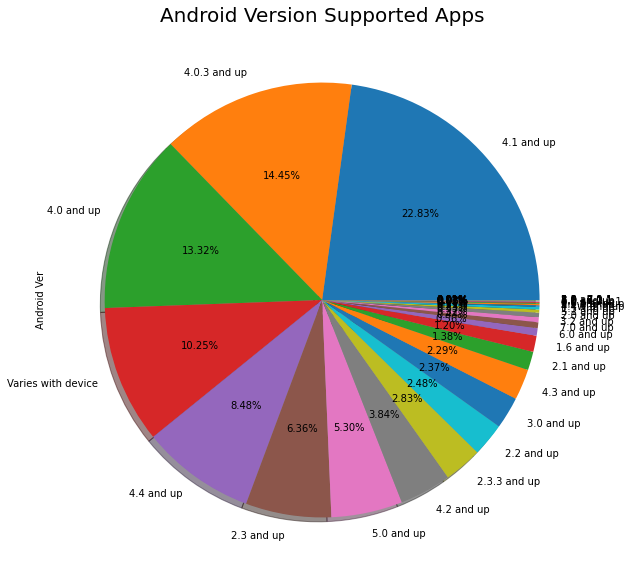

In [57]:
plt.figure(figsize=(15,10))
android_version.plot(kind = 'pie',  autopct='%1.02f%%', shadow=True)
plt.title('Android Version Supported Apps',size=20)
plt.show()

top categories app in the database

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


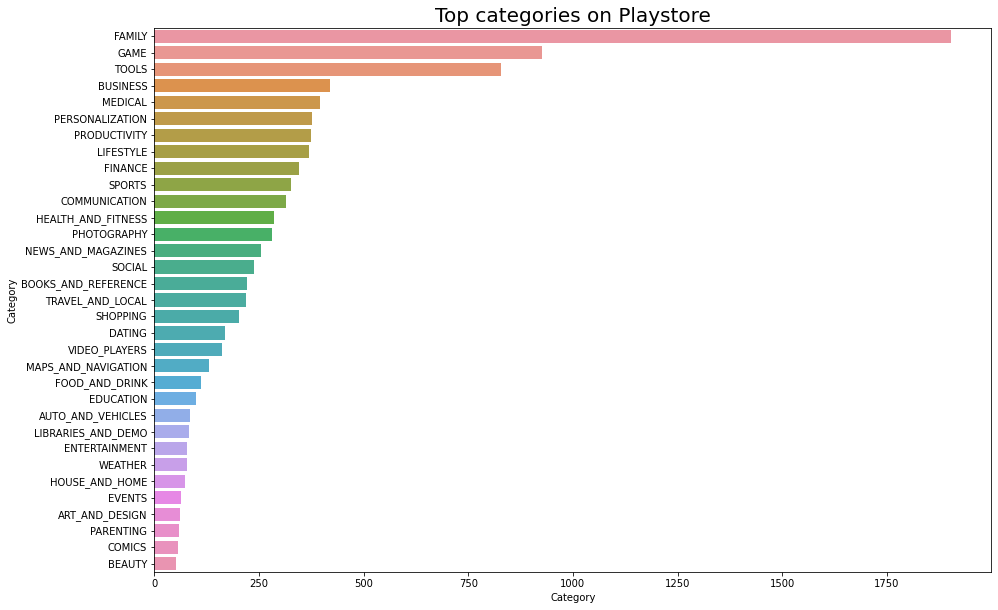

In [58]:
plt.figure(figsize=(15,10))

y = new_playstore_data2['Category'].value_counts().index
x = new_playstore_data2['Category'].value_counts()
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x, y)
graph.set_title("Top categories on Playstore", fontsize = 20);

top genre app in the database

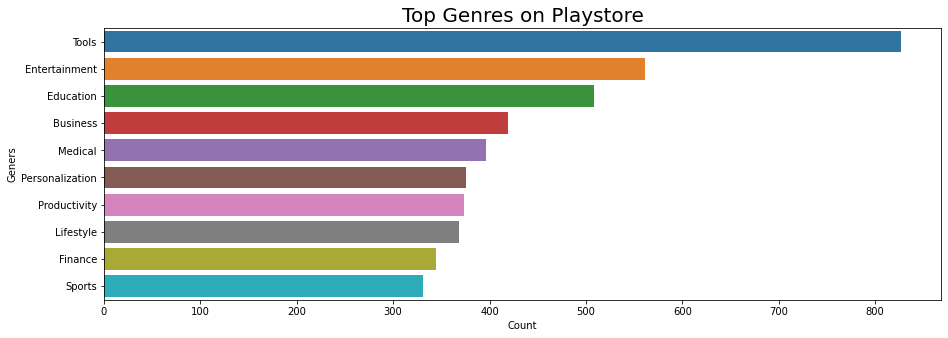

In [59]:
y = new_playstore_data2['Genres'].value_counts().index
x = new_playstore_data2['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

Most Frequently Rated App In The database

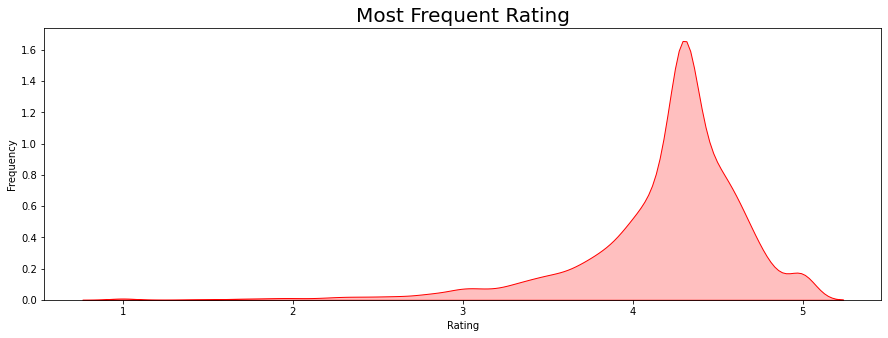

In [61]:
plt.figure(figsize=(15,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(new_playstore_data2.Rating, color="Red", shade = True)
plt.title('Most Frequent Rating',size = 20);

Paid and free app ratio in the database

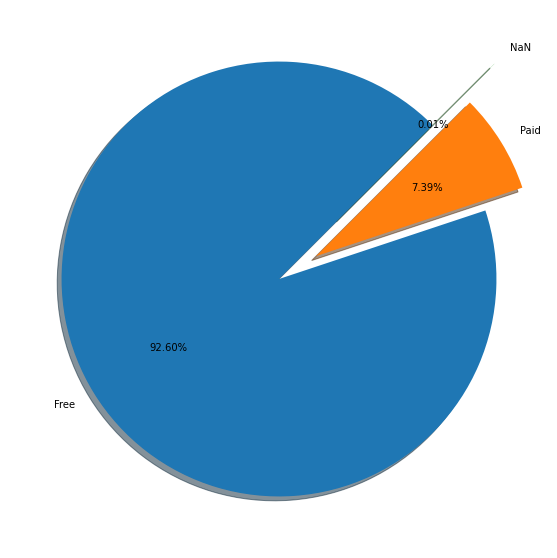

In [63]:
plt.figure(figsize=(15,10))
x=new_playstore_data1.Type.value_counts()
label=["Free","Paid","NaN"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True, explode=[0, 0.2, 0.4], startangle=45)
plt.show()

App updation by year

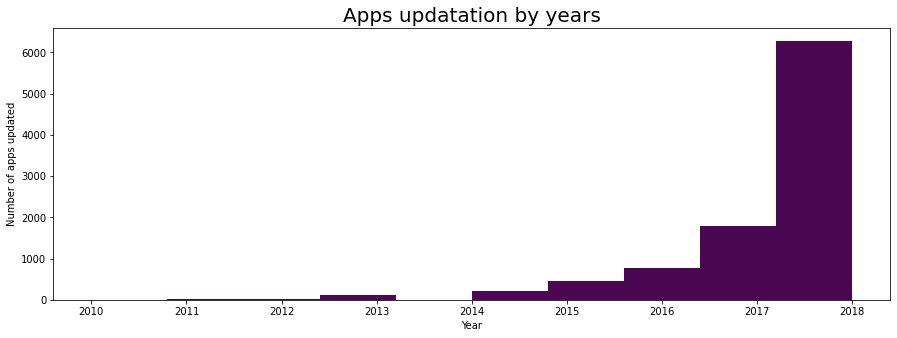

In [65]:
plt.figure(figsize=(15,5))
plt.title("Apps updatation by years", fontsize=20)
ax = plt.hist(new_playstore_data2.Lastupdated_year, color="#4B0751")
plt.tick_params(left='on', bottom='on') 
plt.xlabel("Year")
plt.ylabel("Number of apps updated");
plt.show()

Content rating ratio from the dataset

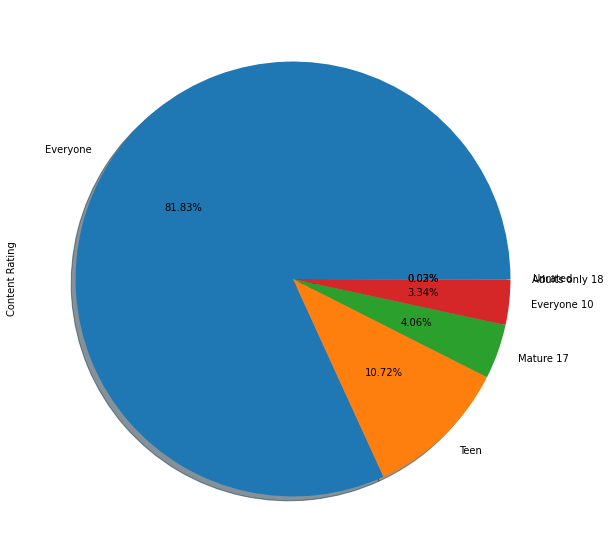

In [66]:
plt.figure(figsize=(15,10))
pd.value_counts(new_playstore_data2["Content Rating"]).plot(kind = 'pie',  autopct='%1.2f%%', shadow=True)
plt.show()

Content rating in free and paid app

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


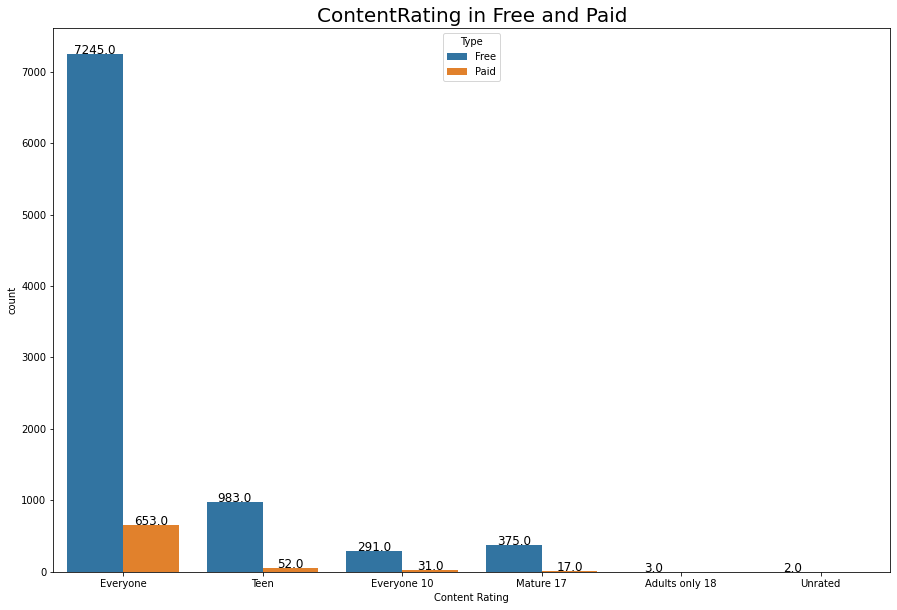

In [67]:
plt.figure(figsize=(15,10))
ax = sns.countplot(new_playstore_data2['Content Rating'],hue=new_playstore_data2['Type']);
plt.title("ContentRating in Free and Paid",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

App size across the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


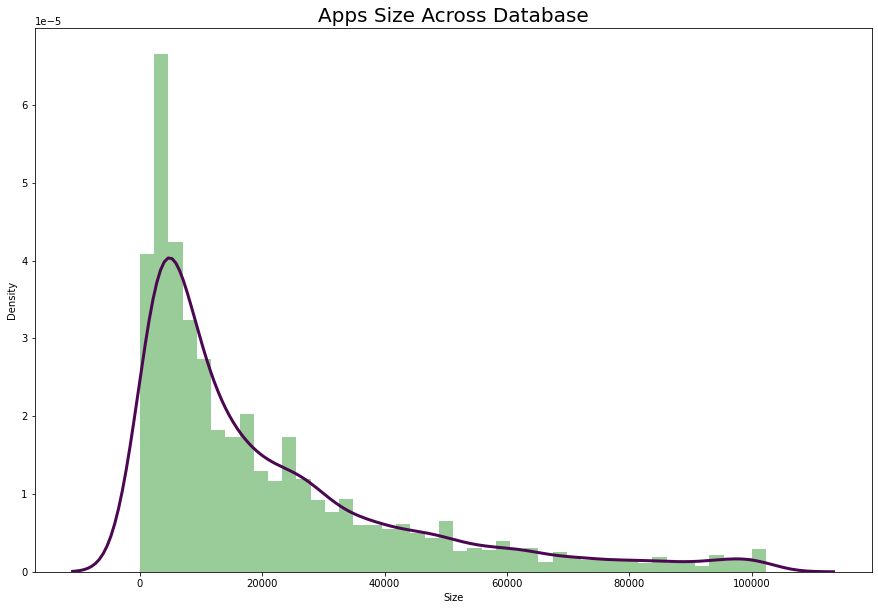

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.distplot(new_playstore_data2['Size'],color='g',kde_kws={'linewidth':3,'color':'#4B0751'});
plt.title("Apps Size Across Database",size=20)
plt.show()

In [72]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [73]:
user_review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [74]:
user_review_df = user_review_df[user_review_df['Translated_Review'].notna()]

In [75]:
user_review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [76]:
user_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [77]:
#marge both database for more analysis

merged_df = new_playstore_data2.merge(user_review_df, on="App")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32352 entries, 0 to 32351
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     32352 non-null  object        
 1   Category                32352 non-null  object        
 2   Rating                  32352 non-null  float64       
 3   Reviews                 32352 non-null  int64         
 4   Size                    22007 non-null  float64       
 5   Installs                32352 non-null  int64         
 6   Type                    32352 non-null  object        
 7   Price                   32352 non-null  float64       
 8   Content Rating          32352 non-null  object        
 9   Genres                  32352 non-null  object        
 10  Last Updated            32352 non-null  datetime64[ns]
 11  Current Ver             32352 non-null  object        
 12  Android Ver             32352 non-null  object

Sentiment data across the dataset

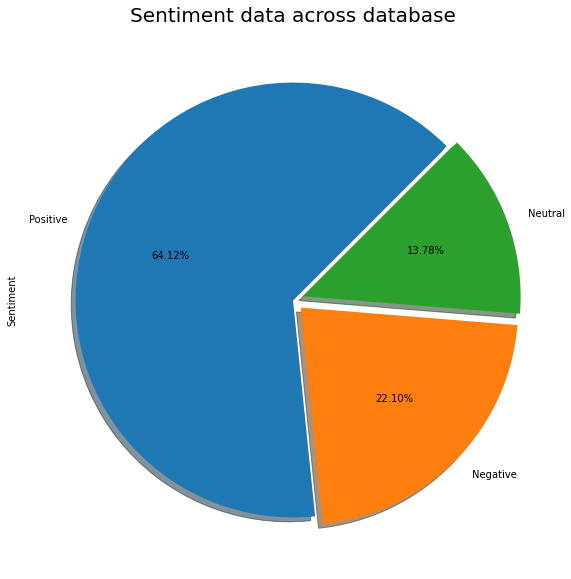

In [79]:
plt.figure(figsize=(15,10))
pd.value_counts(user_review_df["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 )
plt.title("Sentiment data across database",size=20)
plt.show()

App size trend across popular categories

Text(0.5, 1.0, 'App pricing trend across popular categories')

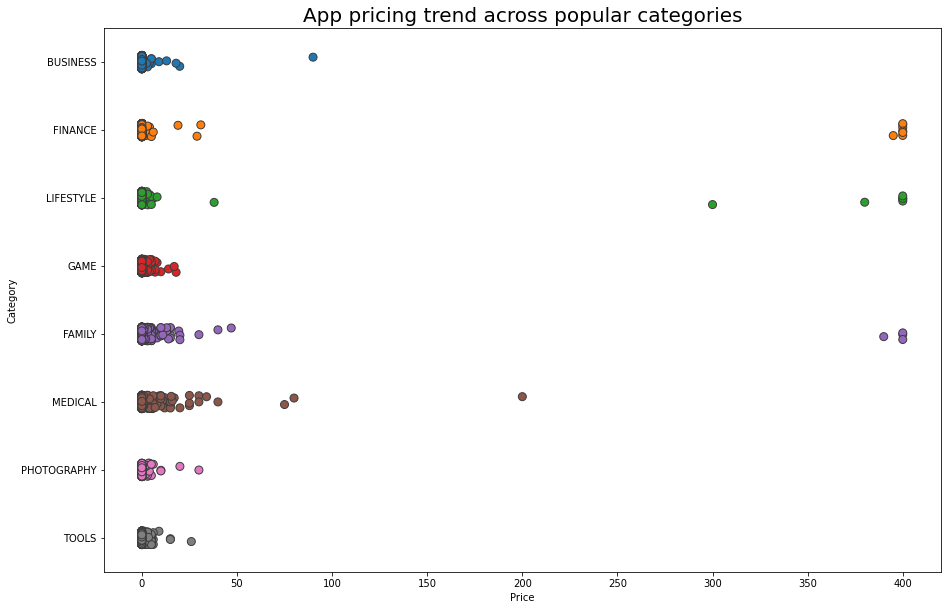

In [80]:
plt.figure(figsize=(15,10))

# Select a few popular app categories
popular_app_cats = new_playstore_data2[new_playstore_data2.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
ax.set_title('App pricing trend across popular categories',size=20)

Age vs sentiment: each age with its Positive,Negative,Nauteral sentiment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


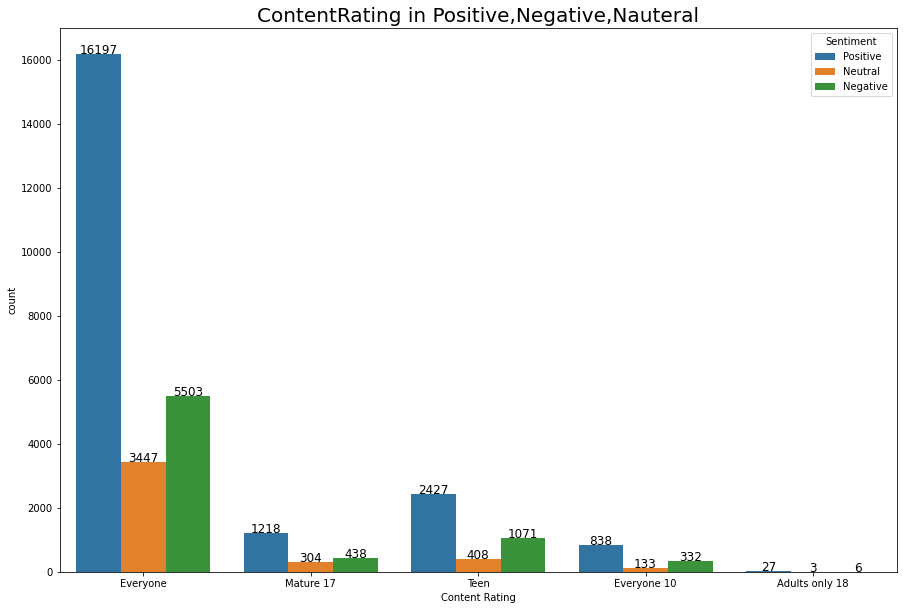

In [81]:
plt.figure(figsize=(15,10))
ax = sns.countplot(merged_df["Content Rating"],hue=merged_df['Sentiment']);
plt.title("ContentRating in Positive,Negative,Nauteral",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)

plt.show()

Feedback in Popular app catagory

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


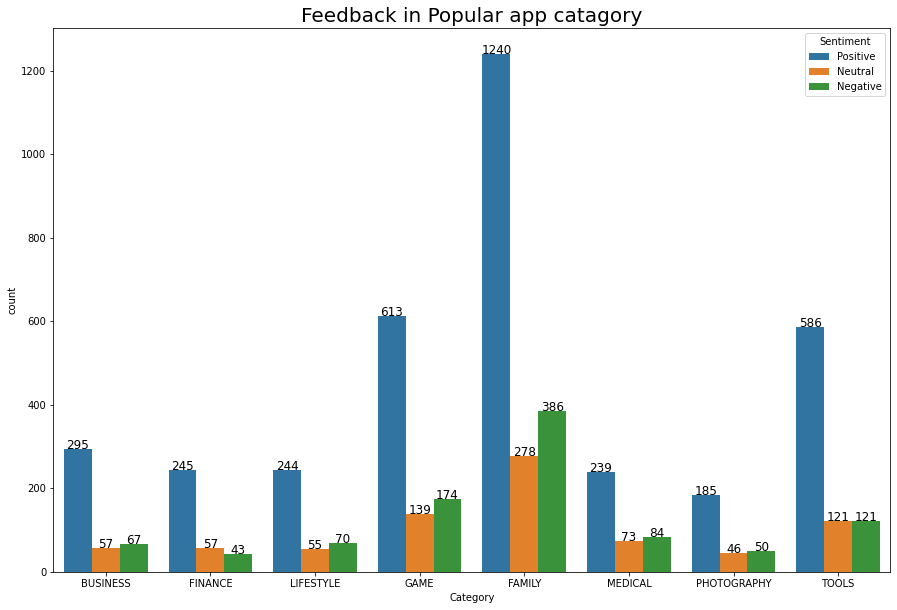

In [82]:
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Sentiment']);
plt.title("Feedback in Popular app catagory",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

Popular Category vs Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


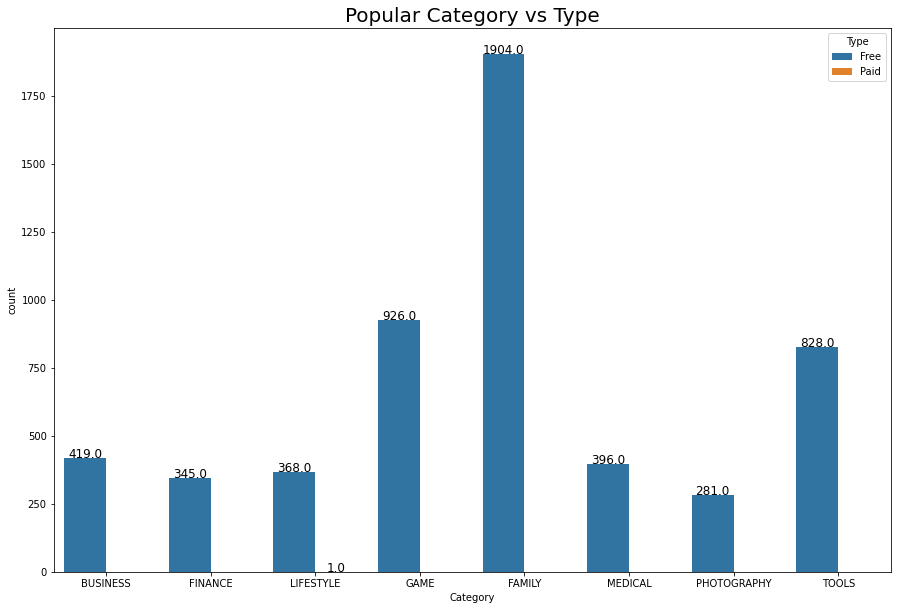

In [83]:
plt.figure(figsize=(15,10))
ax = sns.countplot(popular_app_cats['Category'],hue=merged_df['Type']);
plt.title("Popular Category vs Type",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

Sentiment_Polarity relation with paid and Free App

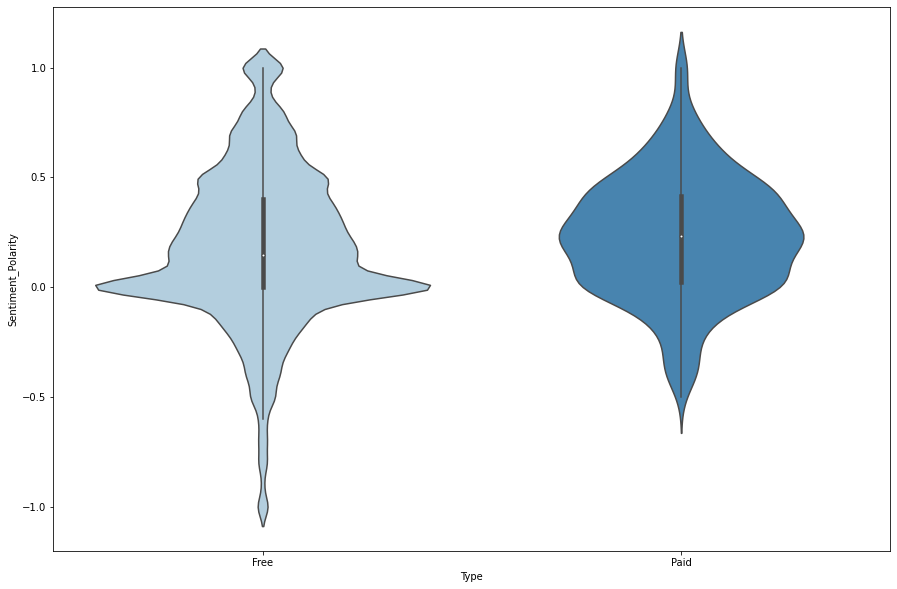

In [84]:

plt.figure(figsize=(15,10))
sns.violinplot(y = merged_df["Sentiment_Polarity"],x = merged_df["Type"],palette="Blues" )
plt.show()

Content Rating Relation with Sebtiment Polarity

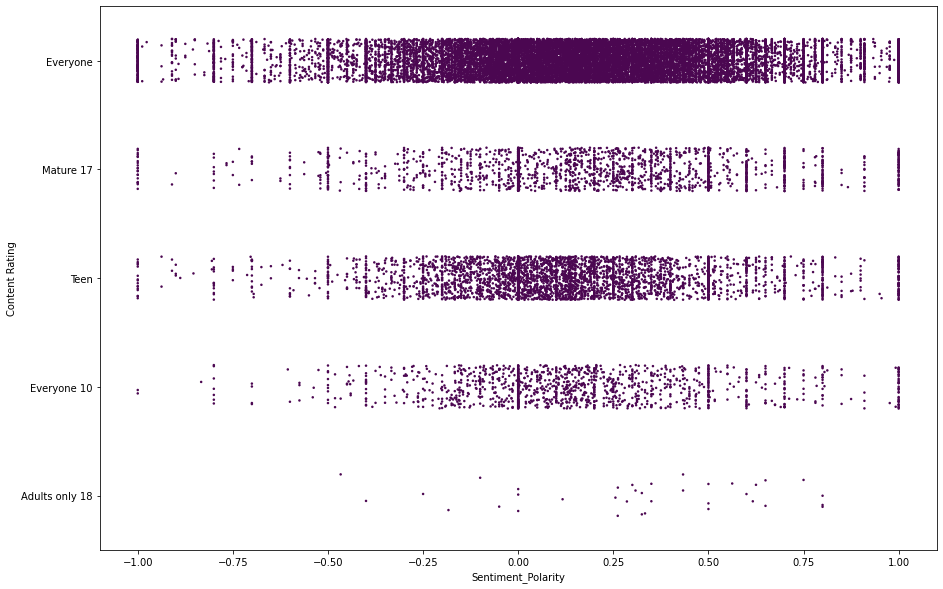

In [85]:
plt.figure(figsize=(15,10))

ax = sns.stripplot(y = merged_df["Content Rating"], x = merged_df["Sentiment_Polarity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


Categories Relation with Sentiment_Subjectivity

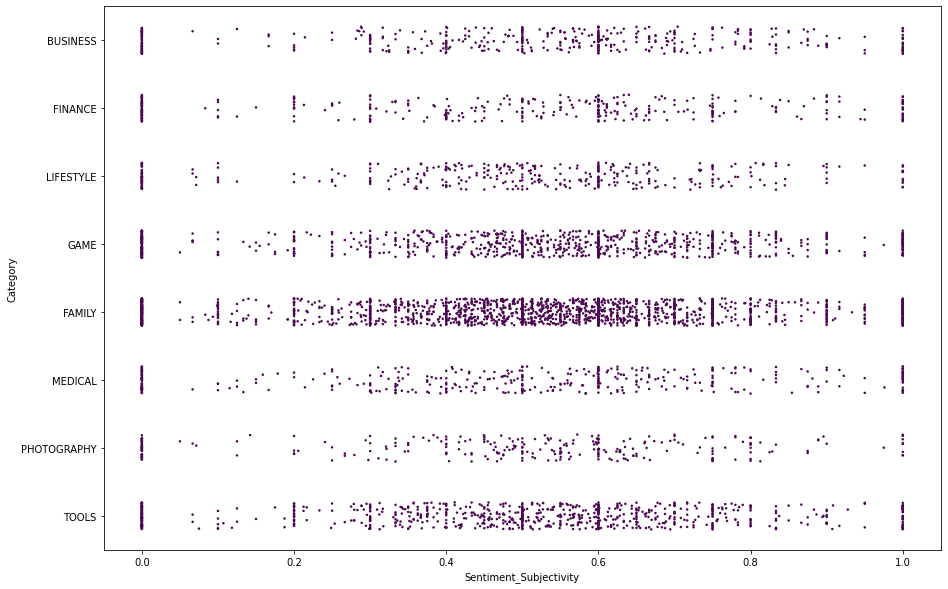

In [86]:
plt.figure(figsize=(15,10))

ax = sns.stripplot(y = popular_app_cats['Category'], x = merged_df["Sentiment_Subjectivity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()

Relational Pair Plot For Understanding Relations Between Diffrent Columns

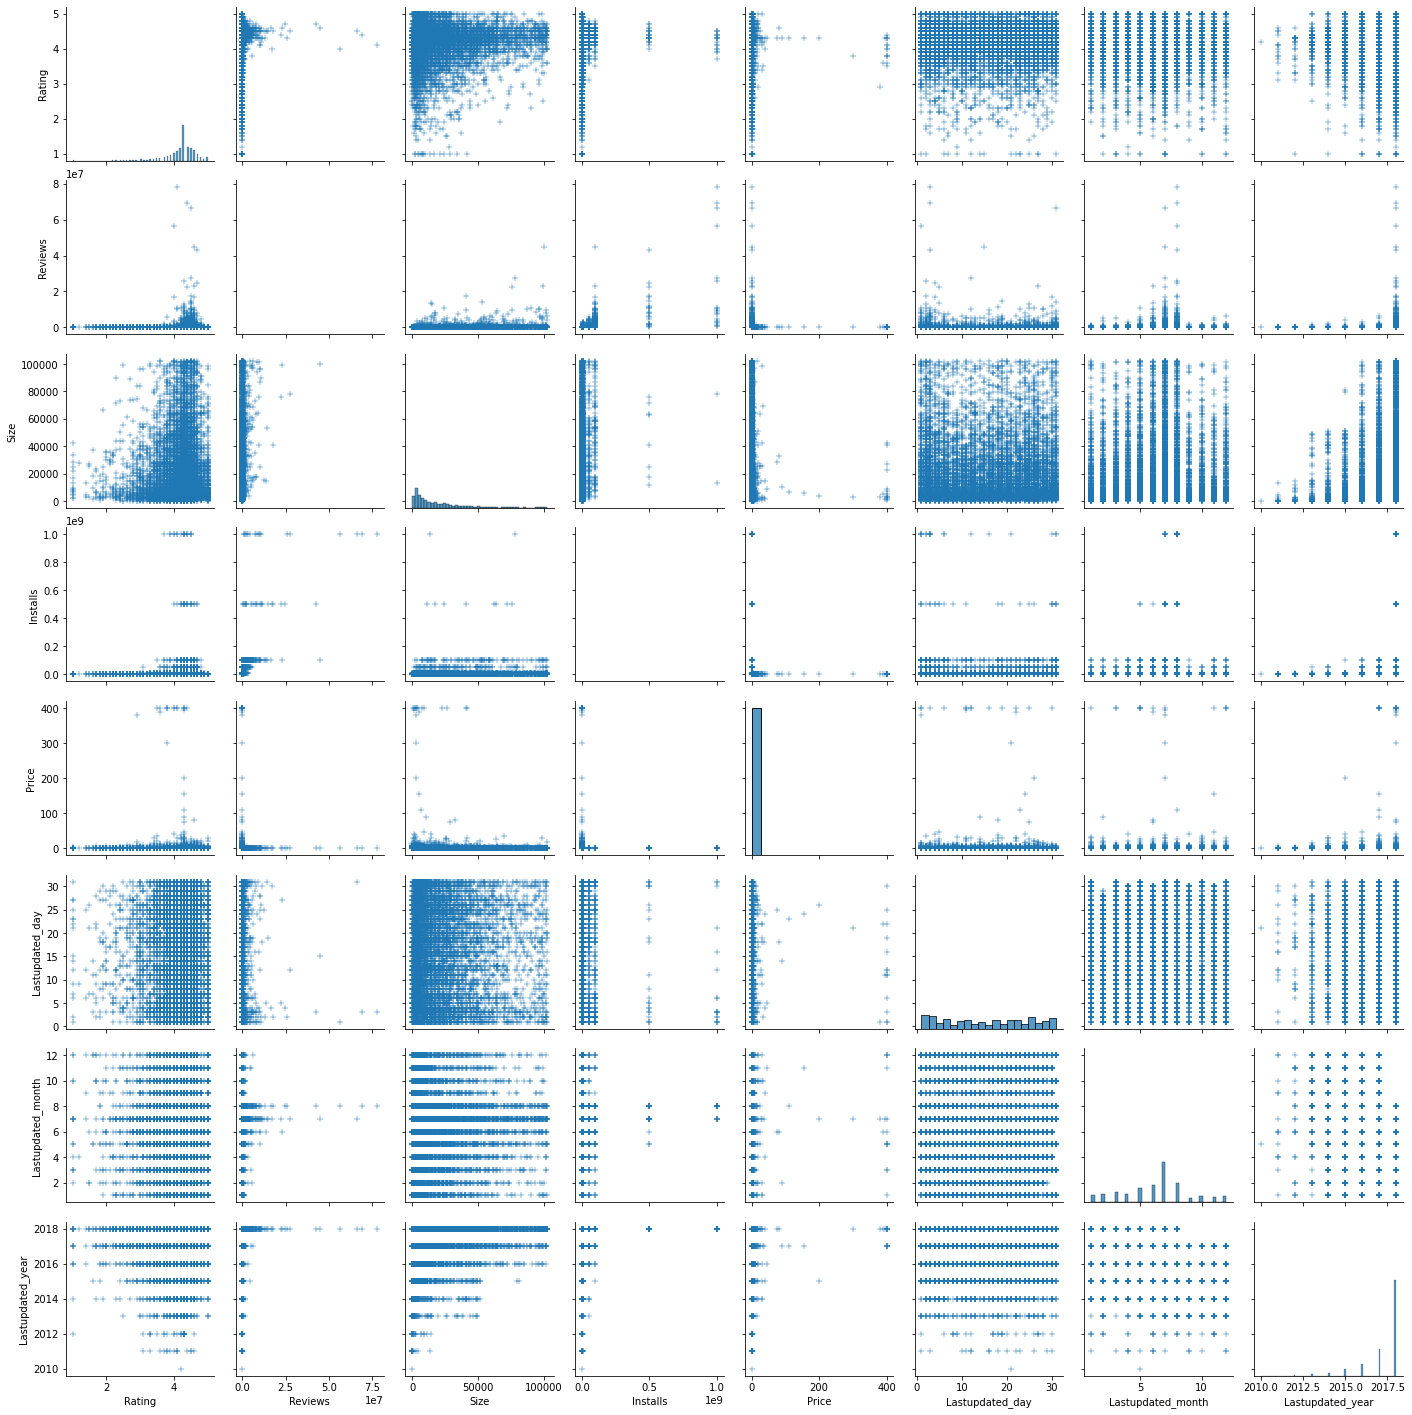

In [88]:
datadigger = sns.pairplot(numerical_data, markers='+')
plt.show(datadigger)

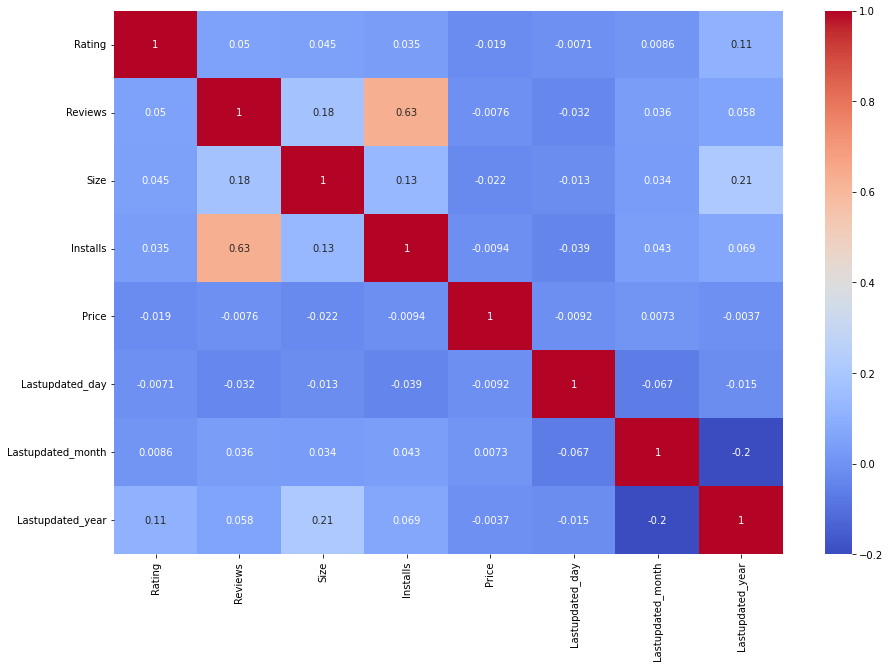

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(numerical_data.corr(),annot=True,cmap='coolwarm')